In [2]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt
from sqlalchemy import create_engine, inspect
from datetime import datetime
from dateutil.relativedelta import relativedelta

In [3]:
import numpy as np
import pandas as pd

In [4]:
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [5]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [6]:
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [7]:
# reflect an existing database into a new model

base = automap_base()

# reflect the tables

base.prepare(engine, reflect = True)

In [8]:
# We can view all of the classes that automap found
base.classes.keys()

['measurement', 'station']

In [9]:
# Save references to each table
measurement = base.classes.measurement
station = base.classes.station

In [10]:
inspector = inspect(engine)

In [11]:
#trying to see what the columns are and what type they are for both measurement and station below

columns = inspector.get_columns('measurement')
for column in columns:
    print(column["name"], column["type"])

id INTEGER
station TEXT
date TEXT
prcp FLOAT
tobs FLOAT


In [12]:
columns = inspector.get_columns('station')
for column in columns:
    print(column["name"], column["type"])

id INTEGER
station TEXT
name TEXT
latitude FLOAT
longitude FLOAT
elevation FLOAT


In [13]:
# Create our session (link) from Python to the DB

session = Session(engine)

In [14]:
session.query(measurement).first()

# Exploratory Climate Analysis

In [80]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results

year_prec = session.query(measurement)

# Calculate the date 1 year ago from the last data point in the database

last_data = session.query(func.max(measurement.date))
last_data.scalar()

date_time_obj = datetime.strptime(last_data.scalar(),'%Y-%m-%d')
new_date = date_time_obj + relativedelta(years=-1)
new_date_string = datetime.strftime(new_date, '%Y-%m-%d').replace(' 0', ' ')
new_date_string


'2016-08-23'

In [79]:
# Perform a query to retrieve the data and precipitation scores
#results = session.query(Dow.high_price - Dow.low_price).\
    #filter(Dow.date > date).filter(Dow.stock == 'IBM').all()
    
last_year_prec = session.query(measurement.date,measurement.prcp).\
filter(measurement.date > new_date_string).all()

last_year_prec



# Save the query results as a Pandas DataFrame and set the index to the date column

panda_prec = pd.DataFrame(last_year_prec).set_index("date")
panda_prec.columns = ["Precipitation"]
panda_prec

# Sort the dataframe by date

panda_prec.sort_index()
panda_prec = panda_prec.sort_index()
panda_prec

,Precipitation
date,
2016-08-24,0.08
2016-08-24,NaN
2016-08-24,2.15
2016-08-24,2.28
2016-08-24,2.15
...,...
2017-08-22,0.00
2017-08-23,0.08
2017-08-23,0.00


(array([-500.,    0.,  500., 1000., 1500., 2000., 2500.]),
 <a list of 7 Text xticklabel objects>)

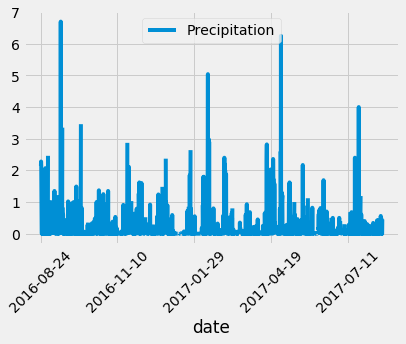

In [73]:

# Use Pandas Plotting with Matplotlib to plot the data

panda_prec.plot()
plt.xticks(rotation=45)

In [74]:
# Use Pandas to calcualte the summary statistics for the precipitation data

panda_prec.agg({'Precipitation':['mean', 'median', 'min', 'max', 'std']})

,Precipitation
mean,0.176462
median,0.020000
min,0.000000
max,6.700000
std,0.460288


In [75]:
# Design a query to show how many stations are available in this dataset?

scount = session.query(station).count()
scount


9

In [76]:
# What are the most active stations? (i.e. what stations have the most rows)?
#filter(measurement.station == station.station)
# List the stations and the counts in descending order.

active_stations = session.query(measurement.station,func.count(measurement.id)).\
filter(measurement.station == station.station).\
group_by(measurement.station).\
order_by(func.count(measurement.id).desc()).all()

active_stations

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [77]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature of the most active station?

low_temp = session.query(func.min(measurement.tobs),func.max(measurement.tobs),func.avg(measurement.tobs)).\
filter(measurement.station == 'USC00519281').all()
low_temp


[(54.0, 85.0, 71.66378066378067)]

In [103]:
# Choose the station with the highest number of temperature observations.

high_temp = session.query(measurement.tobs,measurement.date).\
filter(measurement.station == 'USC00519281').\
filter(measurement.date>= new_date_string).all()

# Query the last 12 months of temperature observation data for this station

high_temp

[(77.0, '2016-08-23'),
 (77.0, '2016-08-24'),
 (80.0, '2016-08-25'),
 (80.0, '2016-08-26'),
 (75.0, '2016-08-27'),
 (73.0, '2016-08-28'),
 (78.0, '2016-08-29'),
 (77.0, '2016-08-30'),
 (78.0, '2016-08-31'),
 (80.0, '2016-09-01'),
 (80.0, '2016-09-02'),
 (78.0, '2016-09-03'),
 (78.0, '2016-09-04'),
 (78.0, '2016-09-05'),
 (73.0, '2016-09-06'),
 (74.0, '2016-09-07'),
 (80.0, '2016-09-08'),
 (79.0, '2016-09-09'),
 (77.0, '2016-09-10'),
 (80.0, '2016-09-11'),
 (76.0, '2016-09-12'),
 (79.0, '2016-09-13'),
 (75.0, '2016-09-14'),
 (79.0, '2016-09-15'),
 (78.0, '2016-09-16'),
 (79.0, '2016-09-17'),
 (78.0, '2016-09-18'),
 (78.0, '2016-09-19'),
 (76.0, '2016-09-20'),
 (74.0, '2016-09-21'),
 (77.0, '2016-09-22'),
 (78.0, '2016-09-23'),
 (79.0, '2016-09-24'),
 (79.0, '2016-09-25'),
 (77.0, '2016-09-26'),
 (80.0, '2016-09-27'),
 (78.0, '2016-09-28'),
 (78.0, '2016-09-29'),
 (78.0, '2016-09-30'),
 (77.0, '2016-10-01'),
 (79.0, '2016-10-02'),
 (79.0, '2016-10-03'),
 (79.0, '2016-10-04'),
 (79.0, '20

In [105]:
#create a df for the query results

last_twelve = pd.DataFrame(high_temp, columns=['Temperatures', 'Date']) 
last_twelve



,Temperatures,Date
0,77.0,2016-08-23
1,77.0,2016-08-24
2,80.0,2016-08-25
3,80.0,2016-08-26
4,75.0,2016-08-27
...,...,...
347,77.0,2017-08-14
348,77.0,2017-08-15
349,76.0,2017-08-16
350,76.0,2017-08-17


Text(0.5, 1.0, 'Temperature Frequency at Station USC00519281')

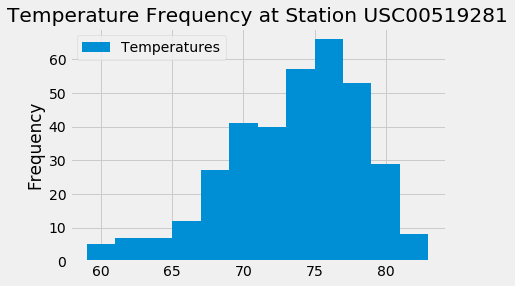

In [109]:
#plot the results as a histogram

last_twelve.plot.hist(bins=12)
plt.title('Temperature Frequency at Station USC00519281')


## Bonus Challenge Assignment

In [ ]:
# This function called `calc_temps` will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, average, and maximum temperatures for that range of dates
def calc_temps(start_date, end_date):
    """TMIN, TAVG, and TMAX for a list of dates.
    
    Args:
        start_date (string): A date string in the format %Y-%m-%d
        end_date (string): A date string in the format %Y-%m-%d
        
    Returns:
        TMIN, TAVE, and TMAX
    """
    
    return session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
        filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).all()

# function usage example
print(calc_temps('2012-02-28', '2012-03-05'))

In [ ]:
# Use your previous function `calc_temps` to calculate the tmin, tavg, and tmax 
# for your trip using the previous year's data for those same dates.


In [ ]:
# Plot the results from your previous query as a bar chart. 
# Use "Trip Avg Temp" as your Title
# Use the average temperature for the y value
# Use the peak-to-peak (tmax-tmin) value as the y error bar (yerr)


In [ ]:
# Calculate the total amount of rainfall per weather station for your trip dates using the previous year's matching dates.
# Sort this in descending order by precipitation amount and list the station, name, latitude, longitude, and elevation



In [ ]:
# Create a query that will calculate the daily normals 
# (i.e. the averages for tmin, tmax, and tavg for all historic data matching a specific month and day)

def daily_normals(date):
    """Daily Normals.
    
    Args:
        date (str): A date string in the format '%m-%d'
        
    Returns:
        A list of tuples containing the daily normals, tmin, tavg, and tmax
    
    """
    
    sel = [func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)]
    return session.query(*sel).filter(func.strftime("%m-%d", Measurement.date) == date).all()
    
daily_normals("01-01")

In [ ]:
# calculate the daily normals for your trip
# push each tuple of calculations into a list called `normals`

# Set the start and end date of the trip

# Use the start and end date to create a range of dates

# Stip off the year and save a list of %m-%d strings

# Loop through the list of %m-%d strings and calculate the normals for each date


In [ ]:
# Load the previous query results into a Pandas DataFrame and add the `trip_dates` range as the `date` index


In [ ]:
# Plot the daily normals as an area plot with `stacked=False`
